In [102]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import uproot
import mplhep as hep
import boost_histogram as bh
from uncertainties import unumpy as unp


In [103]:
files_2022 = glob.glob("output_2022/*.root")
files_2023 = glob.glob("output_2023/*.root")
files_2024 = glob.glob("output_2024/*.root")

In [119]:
def plot_track_yields(files_2022, files_2023, files_2024):

    fig, ax = plt.subplots(figsize=(48, 6))
    run_numbers = []
    lumis = []
    def plot_yield_for_run(fpath, index):
        data = uproot.open(fpath)
        metadata = data['dq'].arrays()
        lumi = metadata['lumi'][0]*1000
        run = np.ravel(metadata['run_number'])[0]

        if lumi < 10: return False# lumi < 10 /pb
        run_numbers.append(run)

        h_good_trk_yield = data['GoodTrkYield'].to_boost()
        h_pos_good_trk_yield = data['GoodPosTrkYield'].to_boost()
        h_neg_good_trk_yield = data['GoodNegTrkYield'].to_boost()

        lumi = unp.uarray(lumi, 0.022 * lumi)
        good_trk_yields = unp.uarray(h_good_trk_yield.values(), np.sqrt(h_good_trk_yield.values()))/lumi
        good_pos_trk_yields = unp.uarray(h_pos_good_trk_yield.values(), np.sqrt(h_pos_good_trk_yield.values()))/lumi
        good_neg_trk_yields = unp.uarray(h_neg_good_trk_yield.values(), np.sqrt(h_neg_good_trk_yield.values()))/lumi

        ax.errorbar([index], unp.nominal_values(good_trk_yields), yerr=unp.std_devs(good_trk_yields), xerr=0.5, linestyle="", linewidth=1, color='blue', label="All Good Tracks")
        ax.errorbar([index], unp.nominal_values(good_pos_trk_yields), yerr=unp.std_devs(good_trk_yields), xerr=0.5, linestyle="", linewidth=1, color='orange', label="Pos. Good Tracks")
        ax.errorbar([index], unp.nominal_values(good_neg_trk_yields), yerr=unp.std_devs(good_trk_yields), xerr=0.5, linestyle="", linewidth=1, color='red', label="Neg. Good Tracks")
        return True


    index = 0
    indices = []
    for i, fpath in enumerate(files_2022):
        if plot_yield_for_run(fpath, index): 
            indices.append(index)    
            index += 1
        

    for i, fpath in enumerate(files_2023):
        if plot_yield_for_run(fpath, index): 
            indices.append(index)
            index += 1
    
    for i, fpath in enumerate(files_2024):
        if plot_yield_for_run(fpath, index):
            indices.append(index)
            index += 1

    ax.set_xlim(indices[0] - 0.5, indices[-1] + 0.5)
    ax.set_xticks(indices)
    ax.set_xticklabels(run_numbers, rotation="vertical", fontsize=8)
    handles, labels = ax.get_legend_handles_labels()
    unique = [
        (h, l)
        for i, (h, l) in enumerate(zip(handles, labels))
        if l not in labels[:i]
    ]
    ax.legend(*zip(*unique), frameon=False)
    plt.savefig("TrackYield.png", dpi=300)

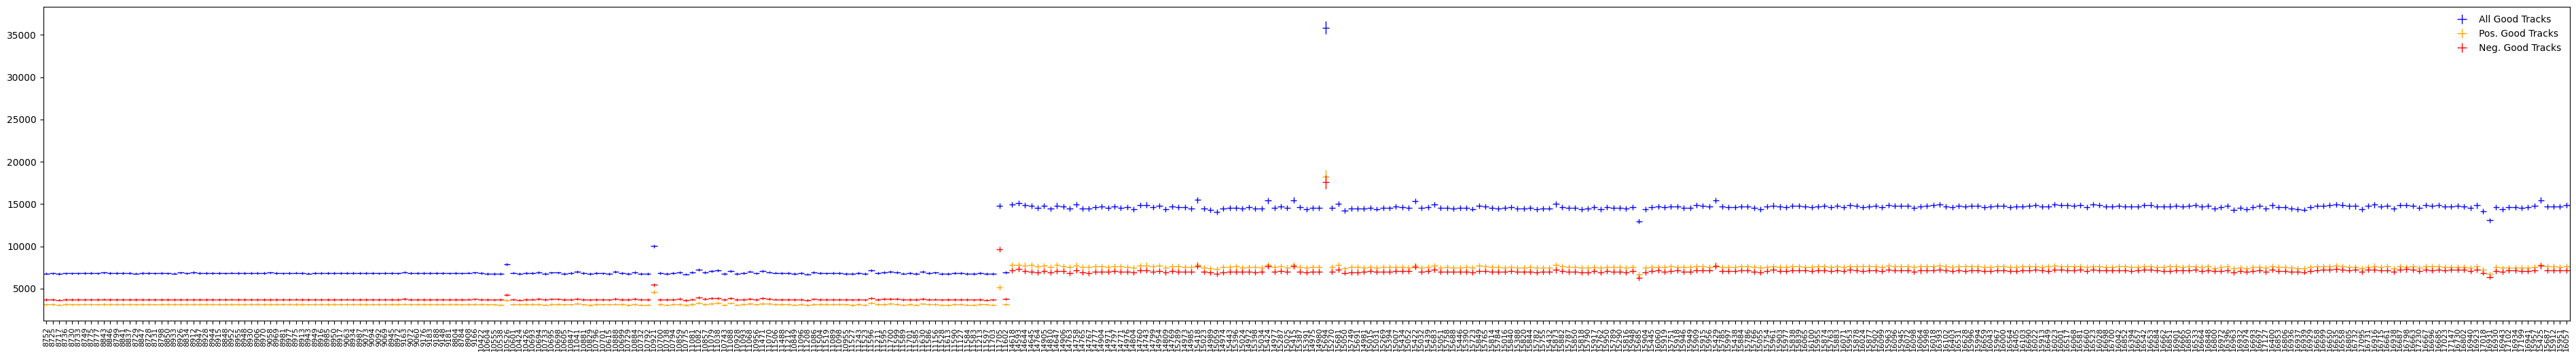

In [120]:
plot_track_yields(files_2022, files_2023, files_2024)